In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 1000  # Number of samples
X = np.random.rand(m, 1) * 10  # Single feature (1D for simplicity)

# Nonlinear relationship (quadratic)
true_theta = np.array([2, -3, 0.5])  # Coefficients for [x^0, x^1, x^2]
y = true_theta[0] + true_theta[1] * X + true_theta[2] * X**2 + np.random.randn(m, 1) * 5  # y = 2 - 3x + 0.5x^2 + noise

# Flatten y for compatibility
y = y.flatten()

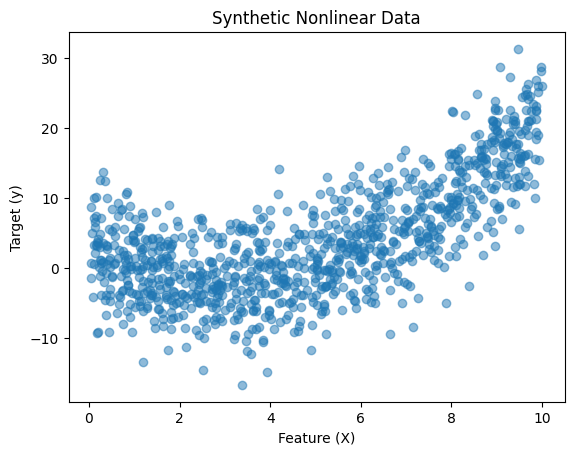

In [3]:
# Plot data
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Synthetic Nonlinear Data")
plt.show()

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate Polynomial Features
degree = 2  # Hyperparameter: polynomial degree
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [5]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-8.04926141 14.07640147]
Model Intercept: 4.2018067429140435


Test MSE: 21.5671
Test R²: 0.6557


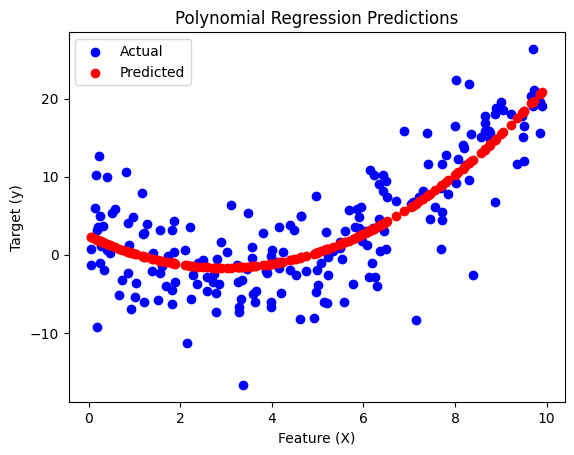

In [6]:
# Predictions
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

# Visualize predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()

Ridge Test MSE: 21.6636
Ridge Test R²: 0.6542


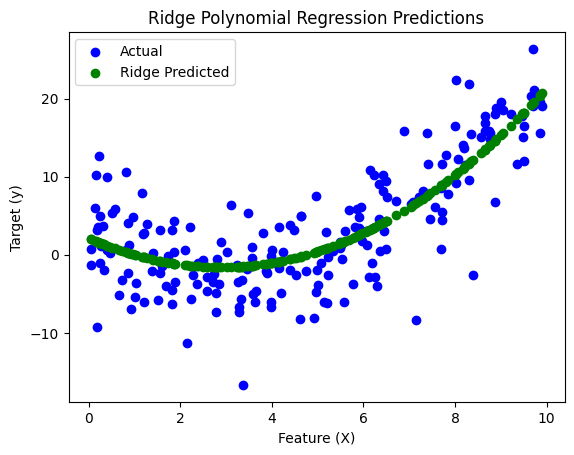

In [7]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)  # alpha = regularization strength
ridge_model.fit(X_train_poly, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_poly)

# Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Test MSE: {mse_ridge:.4f}")
print(f"Ridge Test R²: {r2_ridge:.4f}")

# Visualize Ridge predictions
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred_ridge, color="green", label="Ridge Predicted")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Ridge Polynomial Regression Predictions")
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5],  # Test different degrees
    "ridge__alpha": [0.01, 0.1, 1, 10]  # Test different alpha values
}

# Create pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("polynomialfeatures", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

# Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Degree:", grid_search.best_params_["polynomialfeatures__degree"])
print("Best Alpha:", grid_search.best_params_["ridge__alpha"])

# Refit with best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Metrics
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model Test MSE: {mse_best:.4f}")
print(f"Best Model Test R²: {r2_best:.4f}")

Best Degree: 5
Best Alpha: 0.01
Best Model Test MSE: 21.9245
Best Model Test R²: 0.6500
